## Importing the required libraries

In [18]:
import os 
import numpy as np
import cv2
import pathlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## CONSTRUCTING THE NEURAL NETWORK

First, we start by creating a model object using the Sequential API of Keras.

In [25]:
#Creating an object
model = tf.keras.Sequential()

Shape property is used to see the current shape of x_train.

In [26]:
x_train.shape

(6984, 374, 500, 3)

### Feature extraction layers
Here we make a neural network using Conv2D and MaxPooling2D layers to downsample the input images into smaller convolutions. Combining multiple of these convolutions we are able to capture important features in the image.

In [27]:
#Creating a CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,3, strides=(1,1), padding='same', activation='relu', input_shape = (374,500,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

### Flatten
To connect the 2D convolution and 1D dense layers, we have to "flatten" the convolution layer.

In [28]:
model.add(tf.keras.layers.Flatten())

### Classification layers
Two dense layers are added each with 64 nodes, 0.5 dropout and ReLU activation functions.

In [29]:
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

### Output Layer
The number of nodes will be equal to the number of target classes which is 10 in our case. Softmax activation function is used in the output layer.

In [30]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Optimizer
To configure the model for training, use the .compile() method.

In [31]:
# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'],
)

## Training the model
x_train and y_train datasets will be used for training.

In [32]:
# Train model for 5 epochs, capture the history
results = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(x_valid, y_valid))

Epoch 1/5
55/55 [==============================] - 1337s 24s/step - loss: 2.1093 - accuracy: 0.3438 - val_loss: 8.7991 - val_accuracy: 0.2062
Epoch 2/5
49/55 [=========================>....] - ETA: 2:24 - loss: 1.4190 - accuracy: 0.5271

### Visualize the results

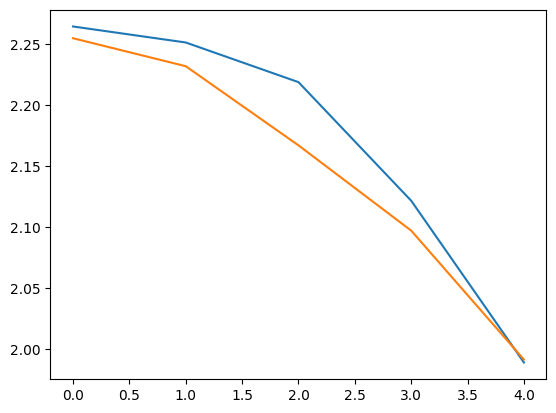

In [41]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

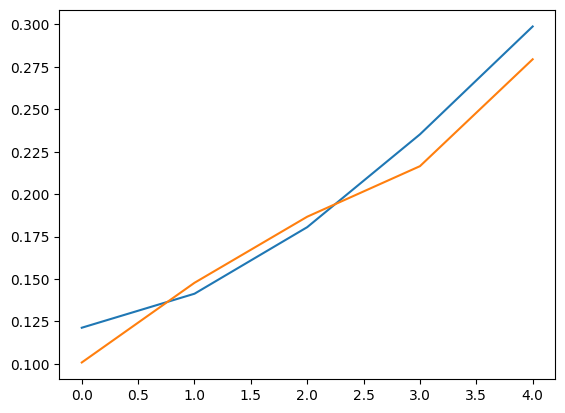

In [42]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

### Performance evaluation

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf_params = {'optimizer': ["adam","SGD","Adamax"],
             'loss' : ["sparse_categorical_crossentropy","categorical_crossentropy","binary_crossentropy"]}

rf_gridcv_model = GridSearchCV(estimator=model, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(x_train,y_train)
rf_gridcv_model.best_params_

print('rf gridcv model accuracy score = {}'.format(rf_gridcv_model.best_score_))